In [3]:
#from google.colab import drive # initial set-up of the environment
#drive.mount('/content/drive')
#import os

#os.chdir('/content/drive/MyDrive/DSMA')
import pandas as pd # import the used libraries within the collab
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import numpy as np
import statistics
import statsmodels.api as sm
import folium
import geopy
from geopy.geocoders import Nominatim
import pandas as pd
import time
import ipywidgets
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
main_dataset = pd.read_csv('imdb_top_1000.csv')
main_dataset.describe(include = ['O'])

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross
count,1000,1000,1000,899,1000,1000,1000,1000,1000,1000,1000,1000,831
unique,1000,999,100,16,140,202,1000,548,660,841,891,939,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,"4,360,000"
freq,1,2,32,234,23,85,1,14,12,7,5,4,5


In [3]:
checking_for_nan_values = main_dataset.copy()
print(f"The number of entries is: {checking_for_nan_values.shape[0]}")
nan_values = checking_for_nan_values.isna().sum()
if np.any(nan_values):
    print("There are missing values in the dataframe:")
    print(nan_values)
else:
    print("No missing values found in the dataframe.")

The number of european entries is: 1000
There are missing values in the dataframe:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [4]:
# We create a separate variable for the rows that have nan value for Gross, before we delete the rows from the table.
main_missing_gross = main_dataset[main_dataset['Gross'].isna()]
main_missing_gross

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.600,The real life of one of America's foremost fou...,90.000,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.600,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,NaN,133 min,"Action, Drama, Mystery",8.600,When a ronin requesting seppuku at a feudal lo...,85.000,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.600,An angel is sent from Heaven to help a despera...,89.000,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.500,A young boy and his little sister struggle to ...,94.000,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://m.media-amazon.com/images/M/MV5BYTE4YW...,Blowup,1966,A,111 min,"Drama, Mystery, Thriller",7.600,A fashion photographer unknowingly captures a ...,82.000,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.600,A young New York socialite becomes interested ...,76.000,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.600,Sprawling epic covering the life of a Texas ca...,84.000,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.600,Several survivors of a torpedoed merchant ship...,78.000,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


We can simply not consider certificate and Meta_score and we will try to get information about Gross from other sources.

In [5]:
data_encoded = main_dataset.copy()
# Delete nan rows for 'Gross'
data_encoded = data_encoded.dropna(subset=['Gross'])
# Since Runtime is a string of the form '86 min', we create a 'Duration' column where we take only the number of minutes in consideration. (Ex: '86 min' -> '86')
data_encoded['Duration'] = data_encoded['Runtime'].str.extract('(\d+)').astype(int)
# The current form for Gross is '30,500,000', but we want to remain with an integer of the form 30500000 .
data_encoded['Gross'] = data_encoded['Gross'].str.replace(',', '').astype(int)
# A mistake in the dataset is that Apollo 13 movies has as released year the value 'PG', instead of 1995.
data_encoded.loc[data_encoded['Released_Year'] == 'PG', 'Released_Year'] = '1995'
# Released_yrar is an object instead of a string, so we parse it to int
data_encoded['Released_Year'] = data_encoded['Released_Year'].astype(int)

In [6]:
checking_for_nan_values = data_encoded.copy()
print(f"The number of entries is: {checking_for_nan_values.shape[0]}")
nan_values = checking_for_nan_values.isna().sum()
if np.any(nan_values):
    print("There are missing values in the dataframe:")
    print(nan_values)
else:
    print("No missing values found in the dataframe.")

The number of european entries is: 831
There are missing values in the dataframe:
Poster_Link       0
Series_Title      0
Released_Year     0
Certificate      46
Runtime           0
Genre             0
IMDB_Rating       0
Overview          0
Meta_score       81
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
Duration          0
dtype: int64


# Data expansion and feature engineering

More features from the current information is hard to create. Because of this, we will analyse similar datasets, to either append new columns or to find datasets that have real values for the Gross column.

In [7]:
# This dataset has a column for 'revenue', which is the same as gross.
helper_dataset1 = pd.read_csv('boxoffice.csv')
helper_dataset1

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avengers: Endgame,BV,857190335,2019
2,3,Avatar,Fox,760507625,2009
3,4,Black Panther,BV,700059566,2018
4,5,Avengers: Infinity War,BV,678815482,2018
...,...,...,...,...,...
16537,16538,Dog Eat Dog,IFC,80,2009
16538,16539,Paranoid Girls,NaN,78,2015
16539,16540,Confession of a Child of the Century,Cohen,74,2015
16540,16541,Storage 24,Magn.,72,2013


In [8]:
helper_dataset1 = helper_dataset1.copy()
new_column_names = {'title': 'Series_Title',
                    'year':'Released_Year'}

helper_dataset1.rename(columns=new_column_names, inplace=True)
helper_dataset1['Released_Year'] = helper_dataset1['Released_Year'].astype(str)

In [9]:
merged_df = pd.merge(main_missing_gross, helper_dataset1, on=['Series_Title','Released_Year'], how='inner')
merged_df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,rank,studio,lifetime_gross
0,https://m.media-amazon.com/images/M/MV5BNmVmYz...,To Kill a Mockingbird,1962,U,129 min,"Crime, Drama",8.200,"Atticus Finch, a lawyer in the Depression-era ...",88.000,Robert Mulligan,Gregory Peck,John Megna,Frank Overton,Rosemary Murphy,293811,NaN,8657,Uni.,592237
1,https://m.media-amazon.com/images/M/MV5BMDVjNj...,The Elephant Man,1980,UA,124 min,"Biography, Drama",8.100,A Victorian surgeon rescues a heavily disfigur...,78.000,David Lynch,Anthony Hopkins,John Hurt,Anne Bancroft,John Gielgud,220078,NaN,2962,Par.,26010864
2,https://m.media-amazon.com/images/M/MV5BZGNjYj...,Network,1976,UA,121 min,Drama,8.100,A television network cynically exploits a dera...,83.000,Sidney Lumet,Faye Dunaway,William Holden,Peter Finch,Robert Duvall,144911,NaN,3141,MGM,23689877
3,https://m.media-amazon.com/images/M/MV5BMzFhNW...,Kagemusha,1980,U,180 min,"Drama, History, War",8.000,A petty thief with an utter resemblance to a s...,84.000,Akira Kurosawa,Tatsuya Nakadai,Tsutomu Yamazaki,Ken'ichi Hagiwara,Jinpachi Nezu,32195,NaN,6054,Fox,4000000
4,https://m.media-amazon.com/images/M/MV5BMjQ5OD...,Who's Afraid of Virginia Woolf?,1966,A,131 min,Drama,8.000,"A bitter, aging couple, with the help of alcoh...",75.000,Mike Nichols,Elizabeth Taylor,Richard Burton,George Segal,Sandy Dennis,68926,NaN,2834,WB,28000000
5,https://m.media-amazon.com/images/M/MV5BZDI2OT...,Amarcord,1973,R,123 min,"Comedy, Drama, Family",7.900,A series of comedic and nostalgic vignettes se...,NaN,Federico Fellini,Magali Noël,Bruno Zanin,Pupella Maggio,Armando Brancia,39897,NaN,11053,Jan.,125493
6,https://m.media-amazon.com/images/M/MV5BYjQ4ZD...,The Philadelphia Story,1940,NaN,112 min,"Comedy, Romance",7.900,When a rich woman's ex-husband and a tabloid-t...,96.000,George Cukor,Cary Grant,Katharine Hepburn,James Stewart,Ruth Hussey,63550,NaN,9194,MGM,404524
7,https://m.media-amazon.com/images/M/MV5BZjMyZm...,Days of Heaven,1978,PG,94 min,"Drama, Romance",7.800,A hot-tempered farm laborer convinces the woma...,93.000,Terrence Malick,Richard Gere,Brooke Adams,Sam Shepard,Linda Manz,52852,NaN,6250,Par.,3446749
8,https://m.media-amazon.com/images/M/MV5BMTYxMD...,Love and Death,1975,PG,85 min,"Comedy, War",7.700,"In czarist Russia, a neurotic soldier and his ...",89.000,Woody Allen,Woody Allen,Diane Keaton,Georges Adet,Frank Adu,36037,NaN,3475,UA,20123742
9,https://m.media-amazon.com/images/M/MV5BMTg2OD...,Rebel Without a Cause,1955,PG-13,111 min,Drama,7.700,A rebellious young man with a troubled past co...,89.000,Nicholas Ray,James Dean,Natalie Wood,Sal Mineo,Jim Backus,83363,NaN,10326,WB,199963


We have 11 movies for which we obtained the gross. When we checked for some of them, these were the real values.

In [10]:
# Delete the useless columns
merged_df = merged_df.drop(columns=['Gross', 'rank', 'studio'])
# Rename the columns
new_column_names = {'lifetime_gross': 'Gross'}
# Change the column name
merged_df.rename(columns=new_column_names, inplace=True)
# Merge the data frames
result_df = pd.concat([merged_df, data_encoded], ignore_index=True)
result_df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Duration
0,https://m.media-amazon.com/images/M/MV5BNmVmYz...,To Kill a Mockingbird,1962,U,129 min,"Crime, Drama",8.200,"Atticus Finch, a lawyer in the Depression-era ...",88.000,Robert Mulligan,Gregory Peck,John Megna,Frank Overton,Rosemary Murphy,293811,592237,NaN
1,https://m.media-amazon.com/images/M/MV5BMDVjNj...,The Elephant Man,1980,UA,124 min,"Biography, Drama",8.100,A Victorian surgeon rescues a heavily disfigur...,78.000,David Lynch,Anthony Hopkins,John Hurt,Anne Bancroft,John Gielgud,220078,26010864,NaN
2,https://m.media-amazon.com/images/M/MV5BZGNjYj...,Network,1976,UA,121 min,Drama,8.100,A television network cynically exploits a dera...,83.000,Sidney Lumet,Faye Dunaway,William Holden,Peter Finch,Robert Duvall,144911,23689877,NaN
3,https://m.media-amazon.com/images/M/MV5BMzFhNW...,Kagemusha,1980,U,180 min,"Drama, History, War",8.000,A petty thief with an utter resemblance to a s...,84.000,Akira Kurosawa,Tatsuya Nakadai,Tsutomu Yamazaki,Ken'ichi Hagiwara,Jinpachi Nezu,32195,4000000,NaN
4,https://m.media-amazon.com/images/M/MV5BMjQ5OD...,Who's Afraid of Virginia Woolf?,1966,A,131 min,Drama,8.000,"A bitter, aging couple, with the help of alcoh...",75.000,Mike Nichols,Elizabeth Taylor,Richard Burton,George Segal,Sandy Dennis,68926,28000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.600,A low-life bandit and an I.R.A. explosives exp...,77.000,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690,157.000
838,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.600,A group of U.S. soldiers sneaks across enemy l...,50.000,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435,144.000
839,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.600,Bagheera the Panther and Baloo the Bear have a...,65.000,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612,78.000
840,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.600,"Over two ""typical"" days in the life of The Bea...",96.000,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024,87.000


Now we will try to merge our data frame with other datasets, in order to create more features.

In [11]:
helper_dataset2 = pd.read_csv('movies10000.csv')
helper_dataset2

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,62.636,8.700,21456
1,1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,19.097,8.700,3652
2,2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,57.656,8.700,15990
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-11-30,41.077,8.600,12778
4,4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,1974-12-20,46.655,8.600,9640
...,...,...,...,...,...,...,...,...
8555,8555,8457,Drillbit Taylor,Three kids hire a low-budget bodyguard to prot...,2008-02-04,9.382,5.700,827
8556,8556,445583,It's All About Karma,"Giacomo befriends a con man, believing that he...",2017-03-09,5.406,5.700,250
8557,8557,411873,The Little Hours,"Garfagnana, Italy, 1347. The handsome servant ...",2017-06-30,23.265,5.700,419
8558,8558,227783,The Nut Job,"Surly, a curmudgeon, independent squirrel is b...",2014-01-17,17.392,5.700,794


In [12]:
copy_helper_dataset2 = helper_dataset2.copy()

copy_helper_dataset2['release_date'] = pd.to_datetime(copy_helper_dataset2['release_date'])

# Create a new column for the year
copy_helper_dataset2['year'] = copy_helper_dataset2['release_date'].dt.year

new_column_names = {'title': 'Series_Title',
                    'year': 'Released_Year'}

copy_helper_dataset2.rename(columns=new_column_names, inplace=True)

merged_df_2 = pd.merge(result_df, copy_helper_dataset2, on=['Series_Title', 'Released_Year'], how='inner')
merged_df_2

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Duration,Unnamed: 0,id,overview,release_date,popularity,vote_average,vote_count
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.300,Two imprisoned men bond over a number of years...,80.000,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,142.000,0,278,Framed in the 1940s for the double murder of h...,1994-09-23,62.636,8.700,21456
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.200,An organized crime dynasty's aging patriarch t...,100.000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,175.000,2,238,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,57.656,8.700,15990
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.000,When the menace known as the Joker wreaks havo...,84.000,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,152.000,15,155,Batman raises the stakes in his war on crime. ...,2008-07-14,71.319,8.500,27577
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.000,The early life and career of Vito Corleone in ...,90.000,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,202.000,4,240,In the continuing saga of the Corleone crime f...,1974-12-20,46.655,8.600,9640
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.000,A jury holdout attempts to prevent a miscarria...,96.000,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,96.000,13,389,The defense and the prosecution have rested an...,1957-04-10,20.176,8.500,6428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,https://m.media-amazon.com/images/M/MV5BYzZhOD...,The Long Goodbye,1973,A,112 min,"Comedy, Crime, Drama",7.600,Private investigator Philip Marlowe helps a fr...,87.000,Robert Altman,Elliott Gould,Nina van Pallandt,Sterling Hayden,Mark Rydell,26337,959000,112.000,1353,1847,Detective Philip Marlowe tries to help a frien...,1973-03-07,8.479,7.500,414
637,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.600,A group of U.S. soldiers sneaks across enemy l...,50.000,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435,144.000,1623,11589,A misfit group of World War II American soldie...,1970-01-01,10.607,7.400,536
638,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.600,Bagheera the Panther and Baloo the Bear have a...,65.000,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612,78.000,2114,9325,The boy Mowgli makes his way to the man-villag...,1967-10-18,69.638,7.300,5281
639,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.600,"Over two ""typical"" days in the life of The Bea...",96.000,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024,87.000,1576,704,"Capturing John Lennon, Paul McCartney, George ...",1964-07-07,9.344,7.400,508


In [13]:
helper_dataset31 = pd.read_csv('train.csv')
helper_dataset32 = pd.read_csv('test.csv')
helper_dataset31

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.249,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.300,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.175,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.000,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.728,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...

In [14]:
copy_helper_dataset31 = helper_dataset31.copy()
copy_helper_dataset32 = helper_dataset32.copy()

new_column_names = {'original_title': 'Series_Title'}

copy_helper_dataset31.rename(columns=new_column_names, inplace=True)
copy_helper_dataset32.rename(columns=new_column_names, inplace=True)

merged_df_31 = pd.merge(result_df, copy_helper_dataset31, on=['Series_Title'], how='inner')
merged_df_32 = pd.merge(result_df, copy_helper_dataset32, on=['Series_Title'], how='inner')


In [15]:
merged_df_31

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Duration,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,https://m.media-amazon.com/images/M/MV5BNmVmYz...,To Kill a Mockingbird,1962,U,129 min,"Crime, Drama",8.200,"Atticus Finch, a lawyer in the Depression-era ...",88.000,Robert Mulligan,Gregory Peck,John Megna,Frank Overton,Rosemary Murphy,293811,592237,NaN,69,NaN,2000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0056592,en,"In a small Alabama town in the 1930s, scrupulo...",14.285,/gQg6sPYfNTUlf8wEtydzWl09RyR.jpg,"[{'name': 'Universal Pictures', 'id': 33}]","[{'iso_3166_1': 'US', 'name': 'United States o...",12/25/62,129.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,To Kill a Mockingbird,"[{'id': 577, 'name': 'black people'}, {'id': 8...","[{'cast_id': 8, 'character': 'Atticus Finch', ...","[{'credit_id': '52fe4259c3a36847f801770d', 'de...",13129846
1,https://m.media-amazon.com/images/M/MV5BMDVjNj...,The Elephant Man,1980,UA,124 min,"Biography, Drama",8.100,A Victorian surgeon rescues a heavily disfigur...,78.000,David Lynch,Anthony Hopkins,John Hurt,Anne Bancroft,John Gielgud,220078,26010864,NaN,1316,NaN,5000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,tt0080678,en,A Victorian surgeon rescues a heavily disfigur...,8.406,/lDXJUmLQsViSKLbil2luD91l2kE.jpg,"[{'name': 'Brooksfilms', 'id': 5612}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",10/2/80,124.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,I am not an animal! I am a human being! I... a...,The Elephant Man,"[{'id': 2804, 'name': 'exploitation'}, {'id': ...","[{'cast_id': 10, 'character': 'Dr. Frederick T...","[{'credit_id': '52fe4326c3a36847f803df5b', 'de...",26010864
2,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.300,Two imprisoned men bond over a number of years...,80.000,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,142.000,2017,NaN,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,tt0111161,en,Framed in the 1940s for the double murder of h...,51.645,/9O7gLzmreU0nGkIB6K3BsJbzvNv.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 9...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/23/94,142.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...","[{'cast_id': 3, 'character': 'Andy Dufresne', ...","[{'credit_id': '52fe4231c3a36847f800b127', 'de...",28341469
3,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.200,An organized crime dynasty's aging patriarch t...,100.000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,175.000,1094,"[{'id': 230, 'name': 'The Godfather Collection...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,tt0068646,en,"Spanning the years 1945 to 1955, a chronicle o...",41.109,/rPdtLWNsZmAtoZl9PK7S2wE3qiS.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",3/14/72,175.000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,"[{'id': 131, 'name': 'italy'}, {'id': 699, 'na...","[{'cast_id': 5, 'character': 'Don Vito Corleon...","[{'credit_id': '52fe422bc3a36847f80093db', 'de...",245066411
4,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.000,When the menace known as the Joker wreaks havo...,84.000,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,

In [16]:
merged_df_32

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Duration,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,https://m.media-amazon.com/images/M/MV5BZGNjYj...,Network,1976,UA,121 min,Drama,8.100,A television network cynically exploits a dera...,83.000,Sidney Lumet,Faye Dunaway,William Holden,Peter Finch,Robert Duvall,144911,23689877,NaN,6763,NaN,3800000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0074958,en,A TV network cynically exploits a deranged ex-...,13.180,/nFovf0eUlbdGRqjdxETFunUAtI0.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",11/1/76,121.000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Not since the dawn of time has America experie...,Network,"[{'id': 417, 'name': 'corruption'}, {'id': 572...","[{'cast_id': 1, 'character': 'Diana Christense...","[{'credit_id': '52fe43b49251416c7501af05', 'de..."
1,https://m.media-amazon.com/images/M/MV5BMjQ5OD...,Who's Afraid of Virginia Woolf?,1966,A,131 min,Drama,8.000,"A bitter, aging couple, with the help of alcoh...",75.000,Mike Nichols,Elizabeth Taylor,Richard Burton,George Segal,Sandy Dennis,68926,28000000,NaN,5892,NaN,7500000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0061184,en,Mike Nichols‚Äô film from Edward Albee's play ...,5.564,/meHvC3nTKd2jE4oSytADtGjR09l.jpg,"[{'name': 'Chenault Productions', 'id': 1684}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/21/66,131.000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,You are cordially invited to George and Martha...,Who's Afraid of Virginia Woolf?,"[{'id': 567, 'name': 'alcohol'}, {'id': 596, '...","[{'cast_id': 3, 'character': 'Martha', 'credit...","[{'credit_id': '52fe423ec3a36847f800f12d', 'de..."
2,https://m.media-amazon.com/images/M/MV5BMTYxMD...,Love and Death,1975,PG,85 min,"Comedy, War",7.700,"In czarist Russia, a neurotic soldier and his ...",89.000,Woody Allen,Woody Allen,Diane Keaton,Georges Adet,Frank Adu,36037,20123742,NaN,4139,NaN,3000000,"[{'id': 36, 'name': 'History'}, {'id': 35, 'na...",NaN,tt0073312,en,"Set in 19th-century Russia, Allen is a cowardl...",5.166,/qRNisGLmcHoEvMjzcvVlcdCnOhO.jpg,"[{'name': 'United Artists', 'id': 60}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/10/75,85.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Love and Death,"[{'id': 4381, 'name': 'napoleon'}, {'id': 1312...","[{'cast_id': 1, 'character': 'Boris Grushenko'...","[{'credit_id': '52fe44799251416c75035f97', 'de..."
3,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.600,Sprawling epic covering the life of a Texas ca...,84.000,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,177909,NaN,3232,NaN,5400000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0049261,en,Sprawling epic covering the life of a Texas ca...,10.864,/1zUkou93TZDY6T5N13to3sr8VZ8.jpg,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/56,201.000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The legendary epic that's as big as Texas.,Giant,"[{'id': 612, 'name': 'hotel'}, {'id': 931, 'na...","[{'cast_id': 1, 'character': 'Leslie Lynnton B...","[{'credit_id': '52fe430ec3a36847f8037419', 'de..."
4,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.000,The early life and career of Vito Corleone in ...,90.000,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,202.000,7233,"[{'id': 230, 'name': 'The Godfather Collection...",13000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,tt0071562,en,In the continuing saga of the Corleone crime f...,36.629,/

In [17]:
helper_dataset4 = pd.read_csv('imdb_movies.csv')
helper_dataset4

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.000,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.000,271616668.000,AU
1,Avatar: The Way of Water,12/15/2022,78.000,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.000,2316794914.000,AU
2,The Super Mario Bros. Movie,04/05/2023,76.000,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.000,724459031.000,AU
3,Mummies,01/05/2023,70.000,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.000,34200000.000,AU
4,Supercell,03/17/2023,61.000,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.000,340941958.600,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.000,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.000,9353729.000,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.000,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.800,6698361.000,US
10175,The Russia House,12/21/1990,61.000,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.000,22997992.000,US
10176,Darkman II: The Return of Durant,07/11/1995,55.000,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.000,475661306.000,US


In [18]:
copy_helper_dataset4 = helper_dataset4.copy()
# Create a dictionary for renaming columns
new_column_names = {'orig_title': 'Series_Title'}

copy_helper_dataset4.rename(columns=new_column_names, inplace=True)

merged_df_4 = pd.merge(result_df, copy_helper_dataset4, on=['Series_Title'], how='inner')
merged_df_4

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Duration,names,date_x,score,genre,overview,crew,status,orig_lang,budget_x,revenue,country
0,https://m.media-amazon.com/images/M/MV5BNmVmYz...,To Kill a Mockingbird,1962,U,129 min,"Crime, Drama",8.200,"Atticus Finch, a lawyer in the Depression-era ...",88.000,Robert Mulligan,Gregory Peck,John Megna,Frank Overton,Rosemary Murphy,293811,592237,NaN,To Kill a Mockingbird,05/31/1963,80.000,Drama,"Scout Finch, 6, and her older brother Jem live...","Gregory Peck, Atticus Finch, Mary Badham, Scou...",Released,English,2000000.000,13129846.000,AU
1,https://m.media-amazon.com/images/M/MV5BMDVjNj...,The Elephant Man,1980,UA,124 min,"Biography, Drama",8.100,A Victorian surgeon rescues a heavily disfigur...,78.000,David Lynch,Anthony Hopkins,John Hurt,Anne Bancroft,John Gielgud,220078,26010864,NaN,The Elephant Man,01/16/1981,81.000,"Drama, History",A Victorian surgeon rescues a heavily disfigur...,"Anthony Hopkins, Dr. Frederick Treves, John Hu...",Released,English,5000000.000,26024614.000,AU
2,https://m.media-amazon.com/images/M/MV5BZGNjYj...,Network,1976,UA,121 min,Drama,8.100,A television network cynically exploits a dera...,83.000,Sidney Lumet,Faye Dunaway,William Holden,Peter Finch,Robert Duvall,144911,23689877,NaN,Network,12/01/1976,79.000,Drama,When veteran anchorman Howard Beale is forced ...,"Peter Finch, Howard Beale, Faye Dunaway, Diana...",Released,English,3800000.000,23689877.000,AU
3,https://m.media-amazon.com/images/M/MV5BYjQ4ZD...,The Philadelphia Story,1940,NaN,112 min,"Comedy, Romance",7.900,When a rich woman's ex-husband and a tabloid-t...,96.000,George Cukor,Cary Grant,Katharine Hepburn,James Stewart,Ruth Hussey,63550,404524,NaN,The Philadelphia Story,12/05/1940,77.000,"Comedy, Romance",When a rich woman's ex-husband and a tabloid-t...,"Cary Grant, C.K. Dexter Haven, Katharine Hepbu...",Released,English,105800000.000,667037174.800,US
4,https://m.media-amazon.com/images/M/MV5BMTg2OD...,Rebel Without a Cause,1955,PG-13,111 min,Drama,7.700,A rebellious young man with a troubled past co...,89.000,Nicholas Ray,James Dean,Natalie Wood,Sal Mineo,Jim Backus,83363,199963,NaN,Rebel Without a Cause,10/25/1956,76.000,Drama,"After moving to a new town, troublemaking teen...","James Dean, Jim Stark, Natalie Wood, Judy, Sal...",Released,English,1500000.000,199963.000,AU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.600,Bagheera the Panther and Baloo the Bear have a...,65.000,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612,78.000,The Jungle Book,04/07/2016,69.000,"Family, Adventure, Drama, Fantasy",A man-cub named Mowgli fostered by wolves. Aft...,"Neel Sethi, Mowgli, Bill Murray, Baloo (voice)...",Released,English,27000000.000,44342956.000,AU
647,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.600,Bagheera the Panther and Baloo the Bear have a...,65.000,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612,78.000,The Jungle Book,12/23/1994,60.000,"Family, Adventure, Drama","Raised by wild animals since childhood, Mowgli...","Jason Scott Lee, Mowgli, Cary Elwes, Captain W...",Released,English,175000000.000,953535821.000,US
648,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.600,Bagheera the Panther and Baloo the Bear have a...,65.000,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612,78.000,The Jungle Book,12/23/1994,60.000,"Family, Adventure, Drama","Raised by wild animals since childhood, Mowgli...","Jason Scott Lee, Mowgli, Cary Elwes, Captain W...",R

In [19]:
checking_for_nan_values = merged_df_2.copy()
print(f"The number of entries is: {checking_for_nan_values.shape[0]}")
nan_values = checking_for_nan_values.isna().sum()
if np.any(nan_values):
    print("There are missing values in the dataframe:")
    print(nan_values)
else:
    print("No missing values found in the dataframe.")

The number of european entries is: 641
There are missing values in the dataframe:
Poster_Link       0
Series_Title      0
Released_Year     0
Certificate      25
Runtime           0
Genre             0
IMDB_Rating       0
Overview          0
Meta_score       39
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
Duration          0
Unnamed: 0        0
id                0
overview          0
release_date      0
popularity        0
vote_average      0
vote_count        0
dtype: int64


In [20]:
final_data = merged_df_2.copy()

final_data = final_data[['Released_Year', 'Genre', 'IMDB_Rating', 'No_of_Votes', 'Gross', 'Duration','popularity', 'vote_average','vote_count', 'Series_Title']]
final_data.head(5)

,Released_Year,Genre,IMDB_Rating,No_of_Votes,Gross,Duration,popularity,vote_average,vote_count,Series_Title
0,1994,Drama,9.300,2343110,28341469,142.000,62.636,8.700,21456,The Shawshank Redemption
1,1972,"Crime, Drama",9.200,1620367,134966411,175.000,57.656,8.700,15990,The Godfather
2,2008,"Action, Crime, Drama",9.000,2303232,534858444,152.000,71.319,8.500,27577,The Dark Knight
3,1974,"Crime, Drama",9.000,1129952,57300000,202.000,46.655,8.600,9640,The Godfather: Part II
4,1957,"Crime, Drama",9.000,689845,4360000,96.000,20.176,8.500,6428,12 Angry Men


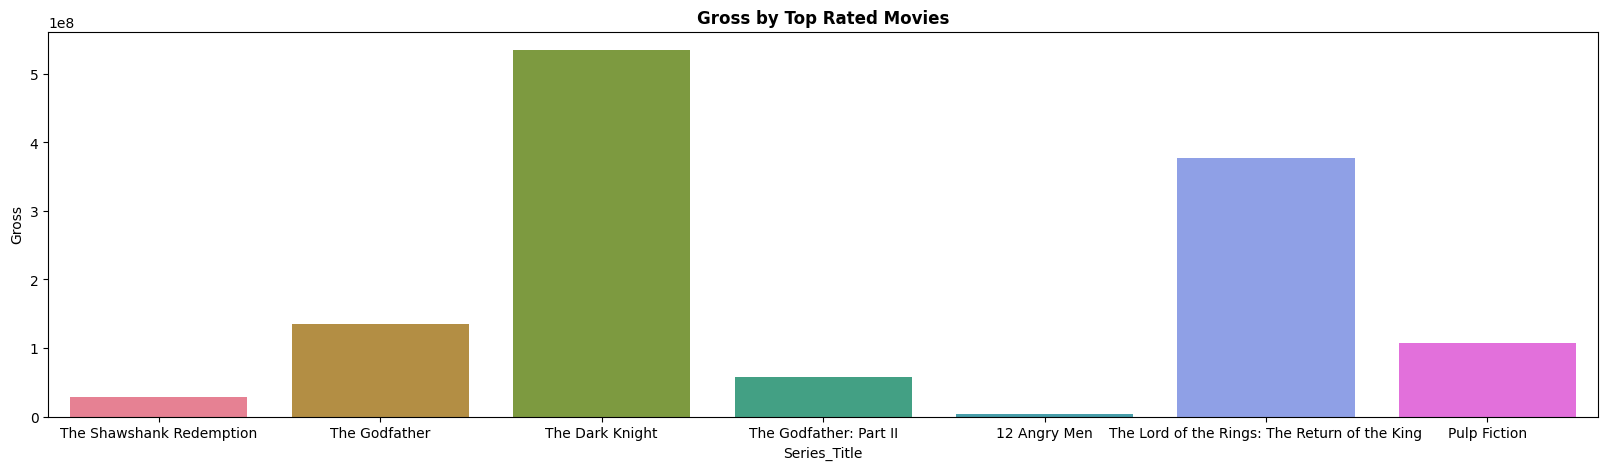

In [21]:
top_titles = final_data['Series_Title'][:7]
top_gross = final_data['Gross'][:7]

# Plotting
fig, axs = plt.subplots(figsize=(20, 5))
g = sns.barplot(x=top_titles, y=top_gross, palette='husl')
g.set_title("Gross by Top Rated Movies", weight="bold")
plt.show()


In [22]:
all_genres = final_data['Genre'].str.split(', ').explode()

# Counting occurrences
genre_counts = all_genres.value_counts()

print(genre_counts)

# List of top 10 genres
top_genres = ['Drama', 'Comedy', 'Adventure', 'Crime', 'Action',
              'Thriller', 'Romance', 'Biography', 'Mystery', 'Sci-Fi']

# Function to filter and return only top genres
def filter_genres(genres):
    return [genre for genre in genres.split(', ') if genre in top_genres]

# Apply the function to the genre column
final_data['filtered_genres'] = final_data['Genre'].apply(filter_genres)

# One-hot encode the filtered genres
one_hot_encoded = final_data['filtered_genres'].str.join('|').str.get_dummies()

# Drop the temporary column
final_data.drop('filtered_genres', axis=1, inplace=True)

# Join the one-hot encoded data with the original DataFrame
final_data = final_data.join(one_hot_encoded)
final_data

Drama        440
Comedy       164
Adventure    147
Crime        127
Action       123
Thriller      89
Biography     81
Romance       75
Mystery       63
Sci-Fi        52
Animation     47
Fantasy       42
Family        40
History       35
War           28
Music         22
Horror        18
Sport         15
Musical       13
Western       12
Film-Noir     11
Name: Genre, dtype: int64


,Released_Year,Genre,IMDB_Rating,No_of_Votes,Gross,Duration,popularity,vote_average,vote_count,Series_Title,Action,Adventure,Biography,Comedy,Crime,Drama,Mystery,Romance,Sci-Fi,Thriller
0,1994,Drama,9.300,2343110,28341469,142.000,62.636,8.700,21456,The Shawshank Redemption,0,0,0,0,0,1,0,0,0,0
1,1972,"Crime, Drama",9.200,1620367,134966411,175.000,57.656,8.700,15990,The Godfather,0,0,0,0,1,1,0,0,0,0
2,2008,"Action, Crime, Drama",9.000,2303232,534858444,152.000,71.319,8.500,27577,The Dark Knight,1,0,0,0,1,1,0,0,0,0
3,1974,"Crime, Drama",9.000,1129952,57300000,202.000,46.655,8.600,9640,The Godfather: Part II,0,0,0,0,1,1,0,0,0,0
4,1957,"Crime, Drama",9.000,689845,4360000,96.000,20.176,8.500,6428,12 Angry Men,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,1973,"Comedy, Crime, Drama",7.600,26337,959000,112.000,8.479,7.500,414,The Long Goodbye,0,0,0,1,1,1,0,0,0,0
637,1970,"Adventure, Comedy, War",7.600,45338,1378435,144.000,10.607,7.400,536,Kelly's Heroes,0,1,0,1,0,0,0,0,0,0
638,1967,"Animation, Adventure, Family",7.600,166409,141843612,78.000,69.638,7.300,5281,The Jungle Book,0,1,0,0,0,0,0,0,0,0
639,1964,"Comedy, Music, Musical",7.600,40351,13780024,87.000,9.344,7.400,508,A Hard Day's Night,0,0,0,1,0,0,0,0,0,0


In [23]:
final_data.drop(columns=['Genre', 'Series_Title'], inplace=True)

In [24]:
checking_for_nan_values = final_data.copy()
print(f"The number of entries is: {checking_for_nan_values.shape}")
nan_values = checking_for_nan_values.isna().sum()
if np.any(nan_values):
    print("There are missing values in the dataframe:")
    print(nan_values)
else:
    print("No missing values found in the dataframe.")

The number of european entries is: (641, 18)
No missing values found in the dataframe.


# Machine learning and hypothesis

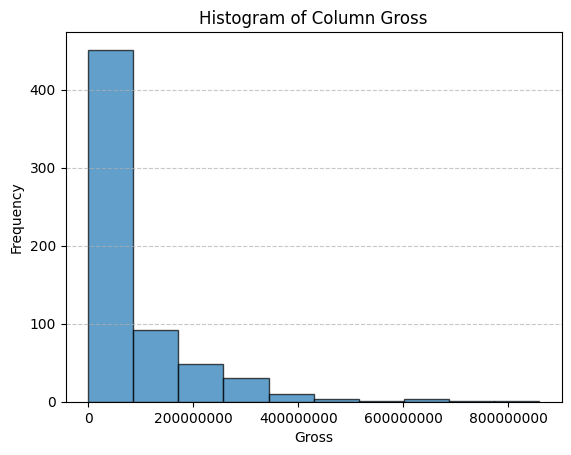

In [25]:
plt.hist(final_data['Gross'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.title('Histogram of Column Gross')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [26]:
cpi_data = [
    13.6,   # 1923
    17.1,   # 1924
    17.5,   # 1925
    17.7,   # 1926
    17.4,   # 1927
    17.1,   # 1928
    17.1,   # 1929
    16.7,   # 1930
    15.2,   # 1931
    13.7,   # 1932
    13.0,   # 1933
    13.4,   # 1934
    13.7,   # 1935
    13.9,   # 1936
    14.4,   # 1937
    14.1,   # 1938
    13.9,   # 1939
    14.0,   # 1940
    14.7,   # 1941
    16.3,   # 1942
    17.3,   # 1943
    17.6,   # 1944
    18.0,   # 1945
    19.5,   # 1946
    22.3,   # 1947
    24.1,   # 1948
    23.8,   # 1949
    24.1,   # 1950
    26.0,   # 1951
    26.5,   # 1952
    26.7,   # 1953
    26.9,   # 1954
    26.8,   # 1955
    27.2,   # 1956
    28.1,   # 1957
    28.9,   # 1958
    29.1,   # 1959
    29.6,   # 1960
    29.9,   # 1961
    30.2,   # 1962
    30.6,   # 1963
    31.0,   # 1964
    31.5,   # 1965
    32.4,   # 1966
    33.4,   # 1967
    34.8,   # 1968
    36.7,   # 1969
    38.8,   # 1970
    40.5,   # 1971
    41.8,   # 1972
    44.4,   # 1973
    49.3,   # 1974
    53.8,   # 1975
    56.9,   # 1976
    60.6,   # 1977
    65.2,   # 1978
    72.6,   # 1979
    82.4,   # 1980
    90.9,   # 1981
    96.5,   # 1982
    99.6,   # 1983
    103.9,  # 1984
    107.6,  # 1985
    109.6,  # 1986
    113.6,  # 1987
    118.3,  # 1988
    124.0,  # 1989
    130.7,  # 1990
    136.2,  # 1991
    140.3,  # 1992
    144.5,  # 1993
    148.2,  # 1994
    152.4,  # 1995
    156.9,  # 1996
    160.5,  # 1997
    163.0,  # 1998
    166.6,  # 1999
    172.2,  # 2000
    177.1,  # 2001
    179.9,  # 2002
    184.0,  # 2003
    188.9,  # 2004
    195.3,  # 2005
    201.6,  # 2006
    207.3,  # 2007
    215.3,  # 2008
    214.5,  # 2009
    218.1,  # 2010
    224.9,  # 2011
    229.6,  # 2012
    232.9,  # 2013
    236.7,  # 2014
    236.5,  # 2015
    236.9,  # 2016
    244.9,  # 2017
    251.6,  # 2018
    255.8,  # 2019
    257.6,  # 2020
    271.0,  # 2021
    292.7,  # 2022
    304.5    # 2023
]

current_cpi = cpi_data[-1]

cpi_mapping = {year: cpi for year, cpi in zip(range(1923, 2023+1), cpi_data)}

# Function to adjust gross based on CPI
def adjust_gross(row):
    year_cpi = cpi_mapping.get(row['Released_Year'], None)
    if year_cpi is not None:
        return row['Gross'] * (current_cpi / year_cpi)
    else:
        return row['Gross']

# Apply the adjustment to the Gross column
final_data['Adjusted_Gross'] = final_data.apply(adjust_gross, axis=1)
final_data = final_data.drop('Gross', axis=1)

final_data

,Released_Year,IMDB_Rating,No_of_Votes,Duration,popularity,vote_average,vote_count,Action,Adventure,Biography,Comedy,Crime,Drama,Mystery,Romance,Sci-Fi,Thriller,Adjusted_Gross
0,1994,9.300,2343110,142.000,62.636,8.700,21456,0,0,0,0,0,1,0,0,0,0,58231965.658
1,1972,9.200,1620367,175.000,57.656,8.700,15990,0,0,0,0,1,1,0,0,0,0,983188328.935
2,2008,9.000,2303232,152.000,71.319,8.500,27577,1,0,0,0,1,1,0,0,0,0,756453303.288
3,1974,9.000,1129952,202.000,46.655,8.600,9640,0,0,0,0,1,1,0,0,0,0,353911764.706
4,1957,9.000,689845,96.000,20.176,8.500,6428,0,0,0,0,1,1,0,0,0,0,47246263.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,1973,7.600,26337,112.000,8.479,7.500,414,0,0,0,1,1,1,0,0,0,0,6576925.676
637,1970,7.600,45338,144.000,10.607,7.400,536,0,1,0,1,0,0,0,0,0,0,10817872.616
638,1967,7.600,166409,78.000,69.638,7.300,5281,0,1,0,0,0,0,0,0,0,0,1293155085.449
639,1964,7.600,40351,87.000,9.344,7.400,508,0,0,0,1,0,0,0,0,0,0,135355397.032


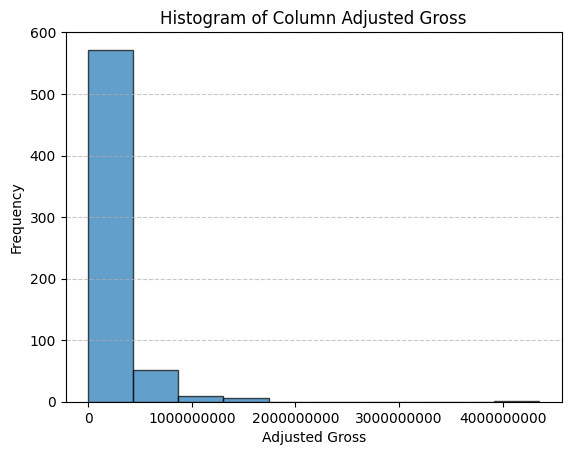

In [27]:
plt.hist(final_data['Adjusted_Gross'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Adjusted Gross')
plt.ylabel('Frequency')
plt.title('Histogram of Column Adjusted Gross')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

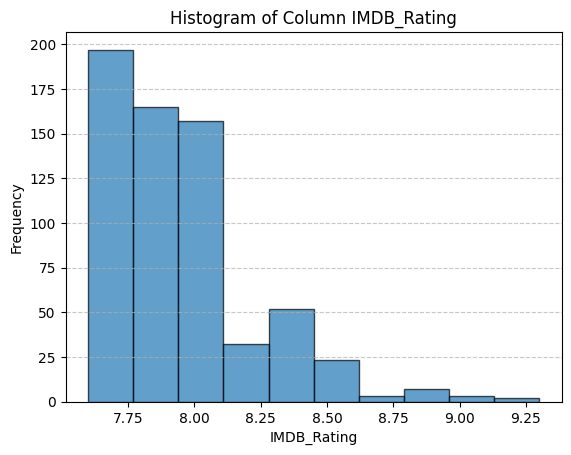

In [28]:
plt.hist(final_data['IMDB_Rating'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('IMDB_Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Column IMDB_Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [29]:
final_data['Released_Year'] = final_data['Released_Year'].astype(int)
final_data.dtypes

Released_Year       int64
IMDB_Rating       float64
No_of_Votes         int64
Duration          float64
popularity        float64
vote_average      float64
vote_count          int64
Action              int64
Adventure           int64
Biography           int64
Comedy              int64
Crime               int64
Drama               int64
Mystery             int64
Romance             int64
Sci-Fi              int64
Thriller            int64
Adjusted_Gross    float64
dtype: object

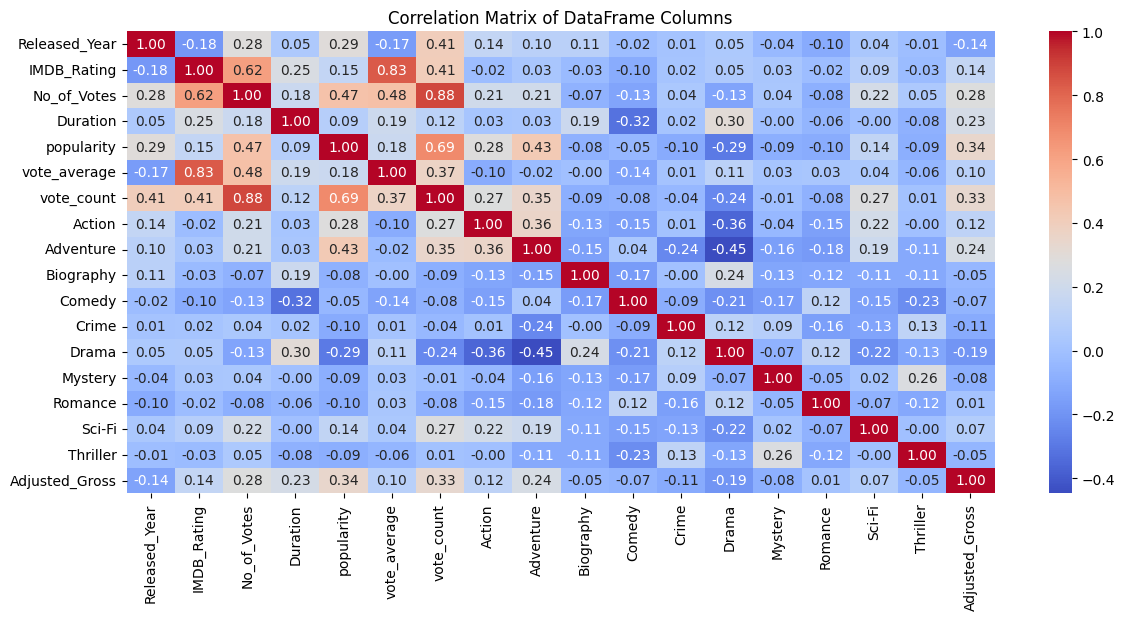

In [30]:
correlation_matrix = final_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of DataFrame Columns")
plt.show()

# Target: IMDB rating

In [31]:
# Separate the target variable, which is 'Weekly_Sales' from the rest of the independent variables.
local_copy = final_data.copy()
X = local_copy.drop(columns=['IMDB_Rating', 'vote_average'])
y = local_copy['IMDB_Rating']

columns = X.columns.tolist()

# we choose a random state to have deterministic results
RANDOM_STATE = 42
X.shape

(641, 16)

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler

# Define 10 models used just for regression
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'XGBRegressor': XGBRegressor(),
    'LGBMRegressor': LGBMRegressor(verbosity=-1)
}

# Metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Cross-validation settings
cv = 3  # Number of folds

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Loop through models
for name, model in models.items():
    mae = -cross_val_score(model, X_scaled, y, cv=cv, scoring=make_scorer(mean_absolute_error)).mean()
    print(f"{name}: MAE = {mae}")
    mse = -cross_val_score(model, X_scaled, y, cv=cv, scoring=make_scorer(mean_squared_error)).mean()
    print(f"{name}: MSE = {mse}")
    _rmse = -cross_val_score(model, X_scaled, y, cv=cv, scoring=make_scorer(rmse)).mean()
    print(f"{name}: RMSE = {_rmse}")


LinearRegression: MAE = -0.2537771545928194
LinearRegression: MSE = -0.0921325039843563
LinearRegression: RMSE = -0.28229950740459936
Ridge: MAE = -0.25502920511777005
Ridge: MSE = -0.0933298410255951
Ridge: RMSE = -0.283702542522744
Lasso: MAE = -0.3293465361222361
Lasso: MSE = -0.15861687069234814
Lasso: RMSE = -0.35469054586610094
RandomForestRegressor: MAE = -0.26895030201980014
RandomForestRegressor: MSE = -0.10464898173255431
RandomForestRegressor: RMSE = -0.30043096382469664
GradientBoostingRegressor: MAE = -0.264388224057388
GradientBoostingRegressor: MSE = -0.10208605665273812
GradientBoostingRegressor: RMSE = -0.2981385562334266
SVR: MAE = -0.269828827657054
SVR: MSE = -0.10854113067604076
SVR: RMSE = -0.3054402124419459
KNeighborsRegressor: MAE = -0.30438213914849427
KNeighborsRegressor: MSE = -0.1379720766969418
KNeighborsRegressor: RMSE = -0.340198233584293
DecisionTreeRegressor: MAE = -0.29089552893686094
DecisionTreeRegressor: MSE = -0.1217887908969915
DecisionTreeRegres

Linear regression gives the best results after cross validation.

In [33]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),

}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Loop through each model, fit, predict and calculate metrics
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    _rmse = rmse(y_test, y_pred)

    # Print metrics
    print(f"{name}: MAE = {mae:.3f}, MSE = {mse:.3f}, RMSE = {_rmse:.3f}")


LinearRegression: MAE = 0.157, MSE = 0.041, RMSE = 0.202
Ridge: MAE = 0.157, MSE = 0.041, RMSE = 0.202


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.95486e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [34]:
coefficients = model.coef_

# Creating a DataFrame for better visualization
import pandas as pd
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sorting the features by their absolute coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)

           Feature  Coefficient  Absolute Coefficient
5           Action       -0.065                 0.065
14        Thriller       -0.040                 0.040
13          Sci-Fi       -0.038                 0.038
9            Crime       -0.033                 0.033
11         Mystery       -0.027                 0.027
12         Romance       -0.025                 0.025
7        Biography       -0.021                 0.021
10           Drama        0.021                 0.021
8           Comedy        0.015                 0.015
0    Released_Year       -0.005                 0.005
6        Adventure        0.002                 0.002
2         Duration        0.002                 0.002
3       popularity        0.000                 0.000
4       vote_count       -0.000                 0.000
1      No_of_Votes        0.000                 0.000
15  Adjusted_Gross       -0.000                 0.000


# Target variable: Gross


In [35]:
# Separate the target variable, which is 'Weekly_Sales' from the rest of the independent variables.
local_copy = final_data.copy()
#local_copy = local_copy[['Released_Year', 'Duration', 'popularity', 'vote_count','Gross', 'Adjusted_Gross']]
X = local_copy.drop(columns=['Adjusted_Gross'])
y = local_copy['Adjusted_Gross']

columns = X.columns.tolist()

# we choose a random state to have deterministic results
RANDOM_STATE = 42

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler

# Define 10 models used just for regression
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'XGBRegressor': XGBRegressor(),
    'LGBMRegressor': LGBMRegressor(verbosity=-1)
}

# Metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Cross-validation settings
cv = 3  # Number of folds

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Loop through models
for name, model in models.items():
    mae = -cross_val_score(model, X_scaled, y, cv=cv, scoring=make_scorer(mean_absolute_error)).mean()
    print(f"{name}: MAE = {mae}")
    mse = -cross_val_score(model, X_scaled, y, cv=cv, scoring=make_scorer(mean_squared_error)).mean()
    print(f"{name}: MSE = {mse}")
    _rmse = -cross_val_score(model, X_scaled, y, cv=cv, scoring=make_scorer(rmse)).mean()
    print(f"{name}: RMSE = {_rmse}")


LinearRegression: MAE = -141365134.29701945
LinearRegression: MSE = -6.471921473144476e+16
LinearRegression: RMSE = -247092275.15177956
Ridge: MAE = -141285846.69353855
Ridge: MSE = -6.470512909363869e+16
Ridge: RMSE = -247062353.92331287
Lasso: MAE = -141365134.78214863
Lasso: MSE = -6.471921499884874e+16
Lasso: RMSE = -247092275.48943147
RandomForestRegressor: MAE = -144180582.65900534
RandomForestRegressor: MSE = -7.786430346650107e+16
RandomForestRegressor: RMSE = -273937027.1697517
GradientBoostingRegressor: MAE = -152752902.69711956
GradientBoostingRegressor: MSE = -9.339500299938603e+16
GradientBoostingRegressor: RMSE = -301759324.78147227
SVR: MAE = -156366221.89379156
SVR: MSE = -9.56583785907636e+16
SVR: RMSE = -301361978.37655467
KNeighborsRegressor: MAE = -149596601.74979684
KNeighborsRegressor: MSE = -7.528341909506182e+16
KNeighborsRegressor: RMSE = -269710892.69515646
DecisionTreeRegressor: MAE = -177523887.12094855
DecisionTreeRegressor: MSE = -1.3723157316618709e+17
De

In [37]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'XGBRegressor': XGBRegressor(gamma = 0, learning_rate = 0.1, max_depth = 3, min_child_weight= 5, n_estimators = 100, random_state=42),
    'LGBMRegressor': LGBMRegressor(learning_rate= 0.01, max_depth= 15, n_estimators= 300, num_leaves= 20, objective= 'regression', random_state= 42, verbosity=-1)
    }

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Loop through each model, fit, predict and calculate metrics
for name, model in models.items():

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    _rmse = rmse(y_test, y_pred)

    # Print metrics
    print(f"{name}: MAE = {mae:.3f}, MSE = {mse:.3f}, RMSE = {_rmse:.3f}")

    if name=='LGBMRegressor':
      feature_importances = model.feature_importances_
      feature_names = model.feature_name_
      lgb_feature_importances = dict(zip(feature_names, feature_importances))
      print(lgb_feature_importances)
    elif name =='XGBRegressor':
      xgb_importances = model.get_booster().get_score(importance_type='weight')
      print(xgb_importances)


LinearRegression: MAE = 154466293.174, MSE = 52615362543095680.000, RMSE = 229380388.314
Ridge: MAE = 154130481.268, MSE = 52513911905911048.000, RMSE = 229159141.004
Lasso: MAE = 154466290.695, MSE = 52615361761400480.000, RMSE = 229380386.610
XGBRegressor: MAE = 143123640.181, MSE = 59677150298651072.000, RMSE = 244289071.181
{'f0': 130.0, 'f1': 40.0, 'f2': 25.0, 'f3': 134.0, 'f4': 44.0, 'f5': 23.0, 'f6': 64.0, 'f7': 8.0, 'f8': 10.0, 'f9': 4.0, 'f11': 5.0, 'f12': 4.0, 'f13': 1.0, 'f14': 8.0, 'f15': 4.0, 'f16': 4.0}
LGBMRegressor: MAE = 152912709.920, MSE = 60595078821457928.000, RMSE = 246160676.838
{'Column_0': 1309, 'Column_1': 264, 'Column_2': 483, 'Column_3': 988, 'Column_4': 997, 'Column_5': 398, 'Column_6': 746, 'Column_7': 2, 'Column_8': 89, 'Column_9': 65, 'Column_10': 51, 'Column_11': 55, 'Column_12': 92, 'Column_13': 49, 'Column_14': 0, 'Column_15': 15, 'Column_16': 13}


In [38]:
'''
LinearRegression: MAE = 141957410.904, MSE = 49135361896349528.000, RMSE = 221664976.702
Ridge: MAE = 141909697.985, MSE = 49120238723322712.000, RMSE = 221630861.396
Lasso: MAE = 141957410.758, MSE = 49135361884537512.000, RMSE = 221664976.675
XGBRegressor: MAE = 143050245.153, MSE = 56499910473442832.000, RMSE = 237697098.159
{'f0': 190.0, 'f1': 146.0, 'f2': 66.0, 'f3': 68.0}
LGBMRegressor: MAE = 155571672.776, MSE = 59773752228180792.000, RMSE = 244486711.762
{'Column_0': 1654, 'Column_1': 1247, 'Column_2': 1371, 'Column_3': 1311}



LinearRegression: MAE = 154466293.174, MSE = 52615362543095680.000, RMSE = 229380388.314
Ridge: MAE = 154130481.268, MSE = 52513911905911048.000, RMSE = 229159141.004
Lasso: MAE = 154466290.695, MSE = 52615361761400480.000, RMSE = 229380386.610
XGBRegressor: MAE = 143123640.181, MSE = 59677150298651072.000, RMSE = 244289071.181
{'f0': 130.0, 'f1': 40.0, 'f2': 25.0, 'f3': 134.0, 'f4': 44.0, 'f5': 23.0, 'f6': 64.0, 'f7': 8.0, 'f8': 10.0, 'f9': 4.0, 'f11': 5.0, 'f12': 4.0, 'f13': 1.0, 'f14': 8.0, 'f15': 4.0, 'f16': 4.0}
LGBMRegressor: MAE = 152912709.920, MSE = 60595078821457928.000, RMSE = 246160676.838
'''

"\nLinearRegression: MAE = 141957410.904, MSE = 49135361896349528.000, RMSE = 221664976.702\nRidge: MAE = 141909697.985, MSE = 49120238723322712.000, RMSE = 221630861.396\nLasso: MAE = 141957410.758, MSE = 49135361884537512.000, RMSE = 221664976.675\nXGBRegressor: MAE = 143050245.153, MSE = 56499910473442832.000, RMSE = 237697098.159\n{'f0': 190.0, 'f1': 146.0, 'f2': 66.0, 'f3': 68.0}\nLGBMRegressor: MAE = 155571672.776, MSE = 59773752228180792.000, RMSE = 244486711.762\n{'Column_0': 1654, 'Column_1': 1247, 'Column_2': 1371, 'Column_3': 1311}\n\n\n\nLinearRegression: MAE = 154466293.174, MSE = 52615362543095680.000, RMSE = 229380388.314\nRidge: MAE = 154130481.268, MSE = 52513911905911048.000, RMSE = 229159141.004\nLasso: MAE = 154466290.695, MSE = 52615361761400480.000, RMSE = 229380386.610\nXGBRegressor: MAE = 143123640.181, MSE = 59677150298651072.000, RMSE = 244289071.181\n{'f0': 130.0, 'f1': 40.0, 'f2': 25.0, 'f3': 134.0, 'f4': 44.0, 'f5': 23.0, 'f6': 64.0, 'f7': 8.0, 'f8': 10.0, 

In [39]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lgbm = lgb.LGBMRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'objective': ['regression'],
    'max_depth': [5, 10, 15],
    'random_state': [42],
}

# Set up the grid search
grid = GridSearchCV(estimator=lgbm, param_grid=param_grid,
                    scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Perform the grid search
grid.fit(X, y)

# Best parameters and best score (negative mean squared error)
print("Best parameters found: ", grid.best_params_)
print("Best score (negative MSE) found: ", grid.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 17
[LightGBM] [Info] Start training from score 190649657.591009
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 300, 'num_leaves': 20, 'objective': 'regression', 'random_state': 42}
Best score (negative MSE) found:  -6.2536397501067416e+16


In [40]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
}

# Set up the grid search
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                    scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Perform the grid search
grid.fit(X, y)

# Best parameters and best score
print("Best parameters found: ", grid.best_params_)
print("Best score (negative MSE) found: ", grid.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100}
Best score (negative MSE) found:  -6.333188602600343e+16


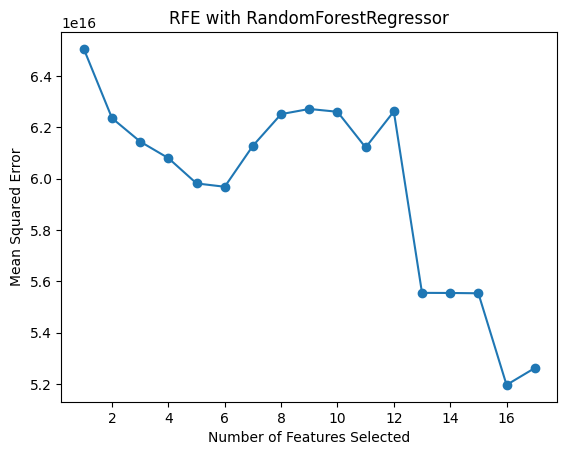

Number of Features: 1
Selected Features: ['Adventure']
MSE: 65062502003773712.000
Number of Features: 2
Selected Features: ['IMDB_Rating', 'Adventure']
MSE: 62363007996647936.000
Number of Features: 3
Selected Features: ['IMDB_Rating', 'Adventure', 'Drama']
MSE: 61448446871257848.000
Number of Features: 4
Selected Features: ['IMDB_Rating', 'Adventure', 'Drama', 'Mystery']
MSE: 60803784616440152.000
Number of Features: 5
Selected Features: ['IMDB_Rating', 'Adventure', 'Comedy', 'Drama', 'Mystery']
MSE: 59817088277483880.000
Number of Features: 6
Selected Features: ['IMDB_Rating', 'Adventure', 'Comedy', 'Drama', 'Mystery', 'Romance']
MSE: 59687309646501024.000
Number of Features: 7
Selected Features: ['IMDB_Rating', 'Adventure', 'Comedy', 'Drama', 'Mystery', 'Romance', 'Sci-Fi']
MSE: 61285376038052848.000
Number of Features: 8
Selected Features: ['IMDB_Rating', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Mystery', 'Romance', 'Sci-Fi']
MSE: 62519144036997072.000
Number of Features: 9
Select

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#regressor = LGBMRegressor(learning_rate= 0.05, max_depth= 5, n_estimators=  100, num_leaves= 20, objective= 'regression', random_state= 42, verbosity=-1)
regressor = LinearRegression()

# Lists to store results
mse_scores = []
feature_sets = []

for i in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=regressor, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    feature_sets.append(rfe.support_)

# Plotting the MSE scores
plt.figure()
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Mean Squared Error')
plt.title('RFE with RandomForestRegressor')
plt.show()

feature_names = X.columns

# Print feature names and their corresponding MSE scores
for i, (features, mse) in enumerate(zip(feature_sets, mse_scores), start=1):
    selected_features = feature_names[features]
    print(f"Number of Features: {i}")
    print(f"Selected Features: {selected_features.tolist()}")
    print(f"MSE: {mse:.3f}")


In [ ]:
'''
LinearRegression: MAE = 48382556.547, MSE = 5903766701006634.000, RMSE = 76835972.702
Ridge: MAE = 48159570.527, MSE = 5879024519321838.000, RMSE = 76674797.159
Lasso: MAE = 48382553.823, MSE = 5903766427195443.000, RMSE = 76835970.920
XGBRegressor: MAE = 48092597.852, MSE = 6384989003063471.000, RMSE = 79906126.192
LGBMRegressor: MAE = 47944986.205, MSE = 6990898724696798.000, RMSE = 83611594.439

After hyper:
LinearRegression: MAE = 48382556.548, MSE = 5903766701175302.000, RMSE = 76835972.703
Ridge: MAE = 48442124.326, MSE = 5907626045847084.000, RMSE = 76861082.778
Lasso: MAE = 48382557.082, MSE = 5903766703503478.000, RMSE = 76835972.718
XGBRegressor: MAE = 48092597.852, MSE = 6384989003063471.000, RMSE = 79906126.192
LGBMRegressor: MAE = 47753341.536, MSE = 6624244694475913.000, RMSE = 81389463.043
'''